**Objective:**
SGD is a useful algorithm with many applications. In this assignment, we will use SGD in the TinyGrad framework as polynomial solver - to find the degree and coefficients.

Usage: *python3 solver.py*

The solver will use data_train.csv to estimate the degree and coefficients of a polynomial. To test the generalization of the learned function, it should have small test error on data_test.csv.

The function should be modeled using tinygrad : https://github.com/geohot/tinygrad

Use SGD to learn the polynomial coefficients.

In [112]:
from tinygrad.tensor import Tensor
import tinygrad.nn.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [98]:
def plotter(data, label=['train']):
    """ 
    Plots data. 
    Copied from Machine-Learning-Helper
    
    """
    
    for d,l in zip(data, label):
        x, y = d
        plt.scatter(x, y, label=l)
    
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
    plt.show()

In [99]:
def calc_loss(y_pred, y_gt):
    """
    Calculate the MAE loss. MAE loss function is used since there are little to no outliers.
    
    Input/s:
        y_pred : predicted y of model
        y_gt   : ground truth y
        
    """
    mae = abs((y_pred-y_gt)).mean()
    return mae

In [100]:
class polynomial:
    """Polynomial model."""
    def __init__(self):
        np.random.seed(42)
        self.preds = np.random.rand(5)
        self.a = Tensor([self.preds[0]], requires_grad = True)
        self.b = Tensor([self.preds[1]], requires_grad = True)
        self.c = Tensor([self.preds[2]], requires_grad = True)
        self.d = Tensor([self.preds[3]], requires_grad = True)
        self.e = Tensor([self.preds[4]], requires_grad = True)

    def forward(self, x):
        return self.a*(x**4) + self.b*(x**3) + self.c*(x**2) + self.d*x + self.e

In [101]:
def get_coeff(model):
    """
    Get the coefficients of the model.
    
    """
    
    param = optim.get_parameters(model)
    coeff = []
    for i in param:
        coeff.append(i.data)
    coeff = np.concatenate(coeff, axis=None)
    return coeff

In [102]:
#gets data from data_test.csv and data_train.csv
data_test = pd.read_csv('data_test.csv')
data_train = pd.read_csv('data_train.csv')
x_train = Tensor([data_train.x])
y_train = Tensor([data_train.y])

In [109]:
#initialize the model
model = polynomial()

#optimization
optimizer = optim.SGD([model.a, model.b, model.c, model.d, model.e], lr = 0.0001)

for epoch in range(1500):
    out = model.forward(x_train)
    error = y_train - out
    loss = error.abs().mean()

    optimizer.zero_grad()
    loss.backward()

    optimizer.clipnorm(5)
    optimizer.step()

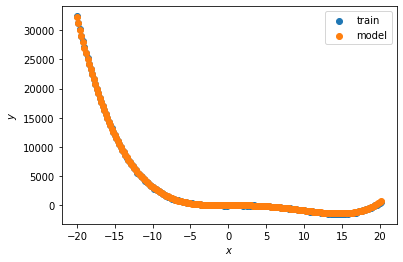

Train loss: 37.33773788633716


In [110]:
# y predictions of model vs y of train data
coeff = get_coeff(model)
X = data_train.x
Y = coeff[0]*(X**4) + coeff[1]*(X**3) + coeff[2]*(X**2) + coeff[3]*X + coeff[4]
plotter([[data_train.x, data_train.y], [X, Y]], label=['train', 'model'])
train_loss = calc_loss(Y, data_train.y)
print(f"Train loss: {train_loss}")

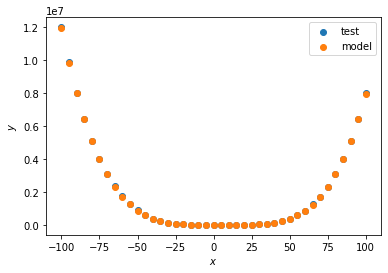

Test loss: 9497.383678674334


In [111]:
# y predictions of model vs y of test data
X = data_test.x
Y = coeff[0]*(X**4) + coeff[1]*(X**3) + coeff[2]*(X**2) + coeff[3]*X + coeff[4]
plotter([[data_test.x, data_test.y], [X, Y]], label=['test', 'model'])
test_loss = calc_loss(Y, data_test.y)
print(f"Test loss: {test_loss}")